In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
csv = pd.read_csv("C:\\Users\\quantum\\Downloads\\SinglePhotonInterferometryUI-master\\SubVIs\MH_OTF_Subtraction\\data (50).csv")
csv.columns=["Channel","Real Time(ns)"]

In [16]:
csv

,Channel,Real Time(ns)
0,1.0,21622.32
1,1.0,21681.91
2,1.0,21829.40
3,1.0,21889.66
4,1.0,32172.16
...,...,...
91946,1.0,312485.84
91947,1.0,353710.82
91948,0.0,41072.64
91949,1.0,79227.23


In [17]:
ch = csv.Channel.values
time = csv['Real Time(ns)'].values

In [18]:
csv

,Channel,Real Time(ns)
0,1.0,21622.32
1,1.0,21681.91
2,1.0,21829.40
3,1.0,21889.66
4,1.0,32172.16
...,...,...
91946,1.0,312485.84
91947,1.0,353710.82
91948,0.0,41072.64
91949,1.0,79227.23


In [48]:
histo1 = [[]]
histo2 = [[]]
hist_start = 18
hist_end = 20
csv_filt = []
triggers = 0
j=0
for i in range(1,len(ch)):
    if ch[i-1]==0:
        triggers+=1
    delay = time[i]-time[i-1]
    if ch[i]!=ch[i-1] and hist_start<delay<hist_end:
        delay_out = delay if ch[i-1]==0 else (-delay)
        # delay_out=delay
        histo1[j].append(delay_out) if (ch[i]==1 or ch[i-1]==1) else None
        histo2[j].append(delay_out) if (ch[i]==2 or ch[i-1]==2) else None
        csv_filt.append([ch[i-1],time[i-1]])
        csv_filt.append([ch[i],time[i]])
        continue
    if triggers> 10000:
        j+=1
        triggers=0
        histo1.append([])
        histo2.append([])


In [49]:
ch_filt = [data[0] for data in csv_filt]
time_filt = [data[1] for data in csv_filt]
j=0
histo12 = []
csv_filt12 = []
for i in range(2,len(csv_filt)):
    
    set_delay = 14.5
    delay01 = time_filt[i-1]-time_filt[i-2]
    delay12 = time_filt[i]-time_filt[i-1]
    
    if ch_filt[i-2]==0 and ch_filt[i-2]!=ch_filt[i-1]!=ch_filt[i] and ((set_delay-2)<delay01<set_delay+2) and (-200)<delay12<200:
        delay_out = delay12 if ch_filt[i-1]==1 else (-delay12)
        histo12.append(delay_out) if ch_filt[i]==1 else histo12.append(-delay_out)
        # histo2.append(delay_out) if (ch[i]==2 or ch[i-1]==2) else None
        csv_filt12.append([ch_filt[i-2],time_filt[i-2]])
        csv_filt12.append([ch_filt[i-1],time_filt[i-1]])
        csv_filt12.append([ch_filt[i],time_filt[i]])
        continue


(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8]),
 <BarContainer object of 9 artists>)

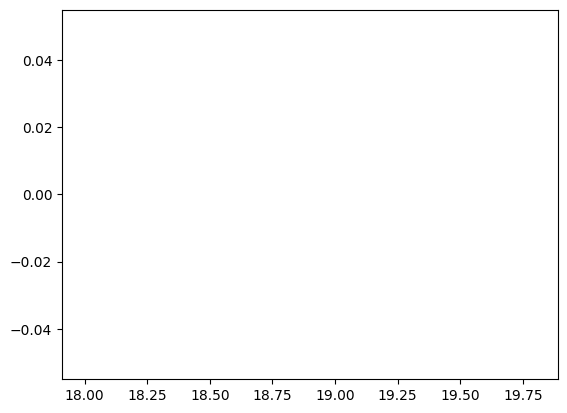

In [50]:
bins =np.arange(hist_start,hist_end,0.2)
plt.hist(histo12,bins=bins)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8]),
 <BarContainer object of 9 artists>)

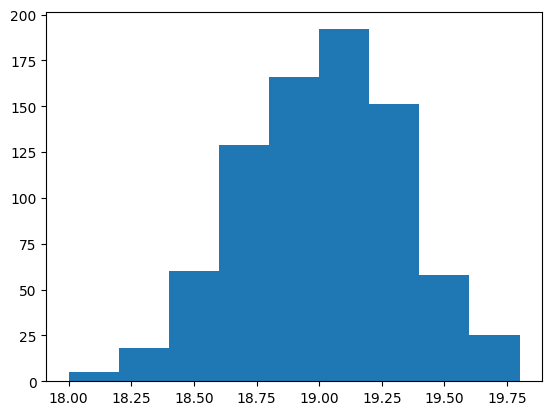

In [52]:
plt.hist(histo1[0],bins=bins)
plt.hist(histo2[0],bins=bins)
# plt.ylim(0,100)
# plt.xlim(10,20)

(array([  5.,  18.,  60., 129., 166., 192., 151.,  58.,  25.]),
 array([18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8]),
 <BarContainer object of 9 artists>)

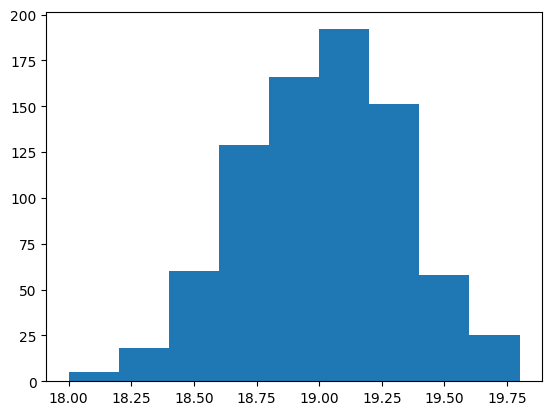

In [53]:
plt.hist(histo1[0],bins=bins)

In [54]:
coin = [len(histo1[i])+len(histo2[i]) for i in range(len(histo1))]
mean = np.mean(coin[:-1])
stdev = np.std(coin[:-1])
dn2 = stdev**2
print(mean, "+-",stdev )
print('δn2', dn2)

818.0 +- 6.0
δn2 36.0


(array([0.06626905, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

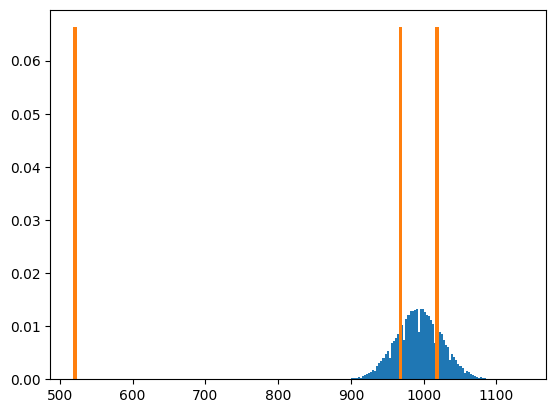

In [28]:
s = np.random.poisson(mean, 100000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.hist(coin,bins=100, density=True)

In [29]:
coin

[967, 1021, 518]

In [163]:
coin[0]/triggers

0.2485435717143034